## Предобработка данных

In [460]:
import pandas as pd
import os
import re
pd.set_option('display.max_rows', 500)
import scipy
from scipy.stats import skew
from scipy.stats import kurtosis
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [461]:
df = pd.read_csv('../../data/final_data.csv')

In [462]:
df['salary_from'] = df['salary_from'].fillna(0)
df['salary_to'] = df['salary_to'].fillna(0)
df['salary'] = df.loc[:,'salary_from'] + df.loc[:,'salary_to']
df.loc[(df.salary_from != 0) & (df.salary_to != 0), 'salary'] = df.salary / 2

In [463]:
df.loc[df.gross == False, 'salary'] = df.salary * 0.87

In [464]:
df.dropna(axis = 0, subset = ['currency', 'gross'], inplace = True)

In [465]:
df.drop(['raw', 'schedule', 'employer', 'salary_from', 'salary_to', 'gross'], axis = 1, inplace = True)

In [466]:
df.drop('employment', axis = 1, inplace = True) 

In [467]:
df.shape

(30639, 11)

In [468]:
df.isna().sum()

premium                         0
name                            0
response_letter_required        0
city                        10502
latitude                    10367
longtitude                  10367
experience                      0
skills                       5989
has_test                        0
currency                        0
salary                          0
dtype: int64

In [469]:
df = df.loc[~(df.salary == 0)]
df = df.loc[~(df.latitude == 0)]
df = df.loc[~(df.longtitude == 0)]
df.loc[(df.salary < 1000) & (df.currency == 'RUR'), 'salary'] = df.loc[(df.salary < 1000) & (df.currency == 'RUR'), 'salary'] * 1000
df.loc[df.currency == 'USD', 'salary'] = df.salary * 60
df.loc[df.currency == 'EUR', 'salary'] = df.salary * 66
df.loc[df.currency.isin(['EUR', 'USD']), 'currency'] = 'RUR'

In [470]:
df.dropna(axis = 0, subset = ['latitude', 'longtitude'], inplace = True)

In [471]:
df.shape

(20144, 11)

In [472]:
import pickle 
import matplotlib.path as mplPath

In [473]:
mapper = {
"Алтайский край":"Южно-Сибирский",
"Республика Алтай":"Южно-Сибирский",
"Курская область":"Центрально-Чернозёмный",
"Тульская область":"Центральный",
"Пермский край":"Волго-Камский",
"Тверская область":"Центральный",
"Липецкая область":"Центрально-Чернозёмный",
"Орловская область":"Центральный",
"Самарская область":"Волго-Уральский",
"Кировская область":"Волго-Камский",
"Брянская область":"Центральный",
"Московская область":"Центральный",
"Смоленская область":"Центральный",
"Рязанская область":"Центральный",
"Калужская область":"Центральный",
"Тамбовская область":"Центрально-Чернозёмный",
"Ростовская область":"Южный",
"Республика Марий Эл":"Волго-Камский",
"Курганская область":"Уральско-Сибирский",
"Мурманская область":"Северно-Западный",
"Республика агестан":"Северно-Кавказский",
"Республика Карелия":"Северно-Западный",
"Ивановская область":"Центральный",
"Кемеровская область":"Южно-Сибирский",
"Вологодская область":"Северно-Западный",
"Магаданская область":"Дальневосточный",
"Республика Татарстан":"Волго-Камский",
"Воронежская область":"Центрально-Чернозёмный",
"Белгородская область":"Центрально-Чернозёмный",
"Ярославская область":"Центральный",
"Ульяновская область":"Волго-Уральский",
"Владимирская область":"Центральный",
"Новосибирская область":"Южно-Сибирский",
"Ленинградская область":"Северно-Западный",
"Астраханская область":"Южный",
"Удмуртская Республика":"Волго-Камский",
"Архангельская область":"Северный",
"Чувашская Республика":"Волго-Камский",
"Республика Калмыкия":"Южный",
"Республика Башкортостан":"Волго-Уральский",
"Республика Саха (Якутия)":"Дальневосточный",
"Кабардино-Балкарская Республика":"Северно-Кавказский",
"Республика Северная Осетия-Алания":"Северно-Кавказский",
"Республика Тыва":"Ангаро-Енисейский",
"Карачаево-Черкесская Республика":"Северно-Кавказский",
"Еврейская автономная область":"Дальневосточный",
"Томская область":"Южно-Сибирский",
"Амурская область":"Дальневосточный",
"Пензенская область":"Волго-Уральский",
"Республика Бурятия":"Дальневосточный",
"Республика Хакасия":"Ангаро-Енисейский",
"Республика Мордовия":"Волго-Камский",
"Саратовская область":"Волго-Уральский",
"Костромская область":"Центральный",
"Республика Ингушетия":"Северно-Кавказский",
"Чеченская Республика":"Северно-Кавказский",
"Калининградская область":"Северно-Западный",
"Псковская область":"Северно-Западный",
"Республика Коми":"Северный",
"Оренбургская область":"Волго-Уральский",
"Новгородская область":"Северно-Западный",
"Челябинская область":"Уральско-Сибирский",
"Ставропольский край":"Северно-Кавказский",
"Свердловская область":"Уральско-Сибирский",
"Волгоградская область":"Южный",
"Республика Адыгея":"Южный",
"Ханты-Мансийский автономный округ":"Уральско-Сибирский",
"Тюменская область":"Уральско-Сибирский",
"Омская область":"Южно-Сибирский",
"Приморский край":"Дальневосточный",
"Хабаровский край":"Дальневосточный",
"Сахалинская область":"Дальневосточный",
"Чукотский автономный округ":"Дальневосточный",
"Красноярский край":"Ангаро-Енисейский",
"Иркутская область":"Ангаро-Енисейский",
"Забайкальский край":"Дальневосточный",
"Камчатский край":"Дальневосточный",
"Ненецкий автономный округ":"Северный",
"Ямало-Ненецкий автономный округ":"Уральско-Сибирский",
"Республика Дагестан":"Северно-Кавказский",
"Краснодарский край":"Южный",
"Нижегородская область":"Волго-Камский",
"Неизвестно" : "Неизвестно" }

In [474]:
def convert_to_region(lat, long):
    coord = np.array([lat, long])
    for reg, area in loaded_dict.items():
        if area.contains_point(coord):
            return reg
    
    return 'Неизвестно'

with open('../../data/saved_dictionary.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)
    
l = []
for v in loaded_dict.values():
    l.append(mplPath.Path(np.array(v['0'])))
    
loaded_dict = dict(zip(list(loaded_dict.keys()), l))
df.loc[:, 'Region'] = df.apply(lambda x: convert_to_region(x.latitude, x.longtitude), axis = 1)

df.loc[:, 'Region'] = df.loc[:, "Region"].map(mapper)

In [475]:
df.loc[(df["city"].isin(["посёлок Русский","Владивосток","Артёмовский городской округ",
                        "посёлок городского типа Забайкальск","поселок городского типа Забайкальск",
                        "городской округ Владивостокский"])) & (df["Region"] == 'Неизвестно'), "Region"] = "Дальневосточный"
df.loc[(df["city"].isin(["посёлок городского типа Кореиз","село Скворцово","посёлок Розовый",
                        "село Дубки","Керчь","посёлок Волна","Анапа","Евпатория",
                        "Симферополь", "Ялта", "Севастополь", "Таганрог", 
                        "посёлок городского типа Сириус", "Новороссийск","Дербент",
                        "село Яблочное","посёлок городского типа Гвардейское","село Белоглинка",
                        "Избербаш","Махачкала","Республика Крым","посёлок городского типа Красногвардейское",
                        "Сочи","село Фонтаны",])) & (df["Region"] == 'Неизвестно'), "Region"] = "Северно-Кавказский"
df.loc[(df["city"].isin(["Архангельск","Полярный"])) & (df["Region"] == 'Неизвестно'), "Region"] = "Северный"
df.loc[(df["city"].isin(["Санкт-Петербург","Ломоносов","Сосновый Бор"]) & (df["Region"] == 'Неизвестно')) , "Region"] = "Северно-Западный"
df.loc[(df["city"].isin(["посёлок Новый"])) & (df["Region"] == 'Неизвестно'), "Region"] = "Уральский"

df.loc[:, "Region"] = df['Region'].str.replace('^Уральский$','Северный и Уральский')
df.loc[:, "Region"] = df['Region'].str.replace('^Северный$','Северный и Уральский')

In [476]:
skills = [i.split('_') for i in df.skills.astype(str)]

In [477]:
skills = pd.Series([item for sublist in skills for item in sublist]).value_counts()

In [478]:
df.skills = df.skills.astype(str)

In [479]:
for v in skills[1:54].index: 
    df.loc[:, v] = df.skills.str.contains(re.compile('(^|_)' + re.escape(v) + '(_|$)')).astype(int)

In [480]:
df.drop(['city', 'skills', 'premium', 'currency'], axis = 1, inplace = True)

In [481]:
df.Region.value_counts()

Центральный               5918
Северно-Западный          2897
Волго-Камский             2263
Уральско-Сибирский        1820
Южно-Сибирский            1769
Волго-Уральский           1416
Южный                     1346
Центрально-Чернозёмный     776
Ангаро-Енисейский          715
Дальневосточный            699
Северно-Кавказский         401
Северный и Уральский        93
Неизвестно                  31
Name: Region, dtype: int64

In [482]:
df.isna().sum()

name                                       0
response_letter_required                   0
latitude                                   0
longtitude                                 0
experience                                 0
has_test                                   0
salary                                     0
Region                                     0
Работа в команде                           0
Пользователь ПК                            0
Грамотная речь                             0
Техническое обслуживание                   0
1С программирование                        0
Linux                                      0
1С: Предприятие 8                          0
Работа в условиях многозадачности          0
SQL                                        0
Работа с большим объемом информации        0
Adobe Photoshop                            0
Настройка ПК                               0
Грамотность                                0
Управление проектами                       0
Git       

In [483]:
df.to_csv('../../data/final_data_salary.csv', index = False)

## Анализ количественных признаков

In [484]:
df = pd.read_csv('../../data/final_data_salary.csv')

In [485]:
df_numeric = df.loc[:, ['latitude', 'longtitude', 'salary']]

In [486]:
df_numeric.describe()

,latitude,longtitude,salary
count,20144.000000,20144.000000,20144.000000
mean,55.031173,50.673507,68776.573470
std,4.115035,23.116306,44979.837912
min,23.608705,-117.780920,8700.000000
25%,54.197104,37.544997,40000.000000
50%,55.749451,39.807944,55000.000000
75%,56.837641,57.498475,82500.000000
max,69.496790,158.679625,522000.000000


In [487]:
stats = []

for (i, col) in enumerate(df_numeric.columns):
    val = df_numeric[col]
    
    stats.append ([col, val.mean(), val.median(), val.min(), val.max(), val.std(), 
                     scipy.stats.skew(val, axis=0, bias=True), 
                     kurtosis(val, axis=0, bias=True), 
                     val.quantile(0.05), val.quantile(0.95), 
                     val.quantile(0.75) - val.quantile(0.25),
                     0])

In [488]:
stats = pd.DataFrame(stats, columns=['Переменная', 'Среднее', 'Медиана', 'Минимум', 'Максимум', 
                                     'Ст. Отклонение', 'Асимметрия', 'Эксцесс', 
                                     '5% Проц', '95% Проц', 'Интерквартильный размах', 'Пропущенные наблюдения'])

In [489]:
stats

,Переменная,Среднее,Медиана,Минимум,Максимум,Ст. Отклонение,Асимметрия,Эксцесс,5% Проц,95% Проц,Интерквартильный размах,Пропущенные наблюдения
0,latitude,55.031173,55.749451,23.608705,69.496790,4.115035,-0.999113,2.253621,45.049750,59.971695,2.640537,0
1,longtitude,50.673507,39.807944,-117.780920,158.679625,23.116306,1.800073,3.544598,30.307736,92.981642,19.953478,0
2,salary,68776.573470,55000.000000,8700.000000,522000.000000,44979.837912,2.418418,8.885286,26100.000000,156600.000000,42500.000000,0


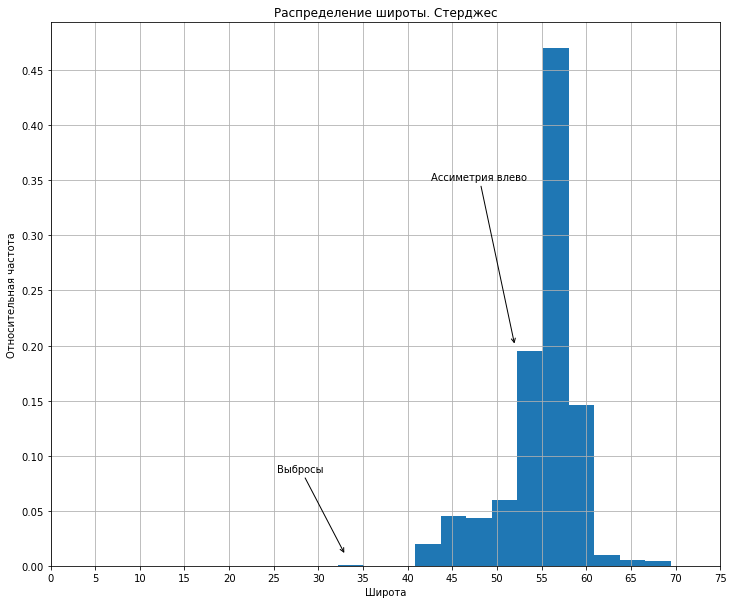

In [490]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.hist(df.latitude, weights = np.ones_like(df.latitude) / len(df.latitude), bins = len(np.histogram_bin_edges(df.latitude, bins='sturges')) - 1) 
plt.ylabel('Относительная частота')
plt.xlabel('Широта')
ax.set_title('Распределение широты. Стерджес')

plt.annotate('Выбросы', xy=(33, 0.01), xytext=(28, 0.085),
             arrowprops={'arrowstyle':'->'}
             ,horizontalalignment='center')

plt.annotate('Ассиметрия влево', xy=(52, 0.2), xytext=(48, 0.35),
             arrowprops={'arrowstyle':'->'}
             ,horizontalalignment='center')

ax.xaxis.set_ticks(np.arange(0, 80, 5))
ax.yaxis.set_ticks(np.arange(0, 0.5, 0.05))

ax.grid()
plt.show()

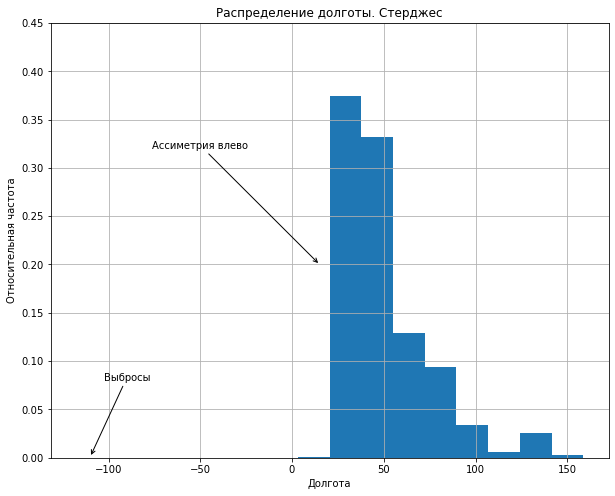

In [491]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.hist(df.longtitude, weights = np.ones_like(df.longtitude) / len(df.longtitude), 
         bins = len(np.histogram_bin_edges(df.longtitude, bins='sturges')) - 1) 
plt.ylabel('Относительная частота')
plt.xlabel('Долгота')
ax.set_title('Распределение долготы. Стерджес')

plt.annotate('Выбросы', xy=(-110, 0.001), xytext=(-90, 0.08),
             arrowprops={'arrowstyle':'->'}
             ,horizontalalignment='center')

plt.annotate('Ассиметрия влево', xy=(15, 0.20), xytext=(-50, 0.32),
             arrowprops={'arrowstyle':'->'}
             ,horizontalalignment='center')


ax.yaxis.set_ticks(np.arange(0, 0.5, 0.05))

ax.grid()
plt.show()

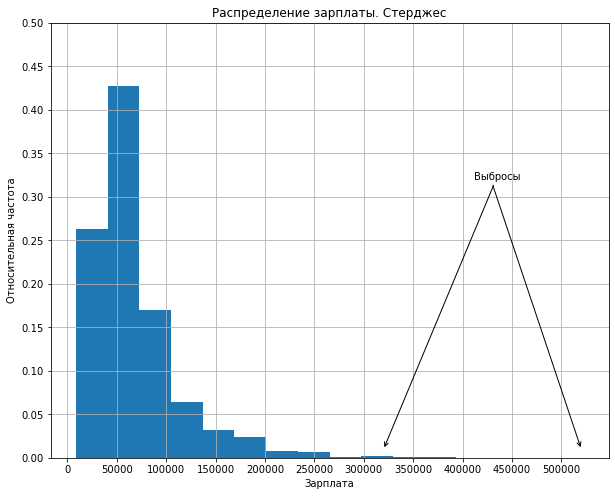

In [492]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.hist(df.salary, weights = np.ones_like(df.salary) / len(df.salary), 
         bins = len(np.histogram_bin_edges(df.salary, bins='sturges')) - 1)

plt.ylabel('Относительная частота')
plt.xlabel('Зарплата')
ax.set_title('Распределение зарплаты. Стерджес')

plt.annotate('Выбросы', xy=(320000, 0.01), xytext=(435000, 0.32),
             arrowprops={'arrowstyle':'->'}
             ,horizontalalignment='center')

plt.annotate('', xy=(520000, 0.01), xytext=(430000, 0.315),
             arrowprops={'arrowstyle':'->'}
             ,horizontalalignment='center')

ax.xaxis.set_ticks(np.arange(0, 550000, 50000))
ax.yaxis.set_ticks(np.arange(0, 0.55, 0.05))

ax.grid()
plt.show()

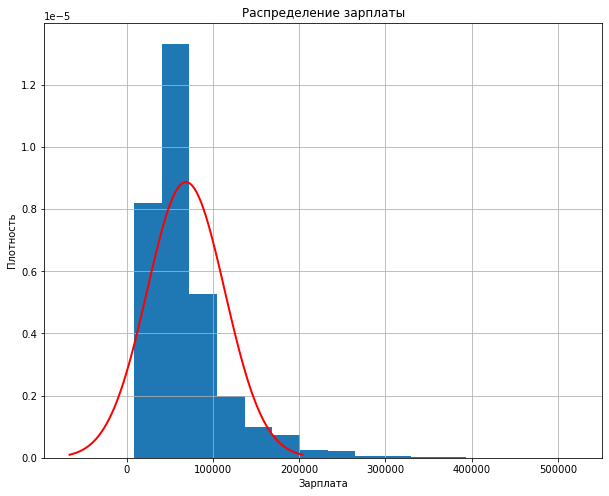

In [493]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.hist(df.salary, density=True, 
         bins = 'sturges')

plt.ylabel('Плотность')
plt.xlabel('Зарплата')
ax.set_title('Распределение зарплаты')

mean = np.mean(df.salary)
std = np.std(df.salary)
x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2) ), linewidth=2, color='r')

ax.grid()
plt.show()

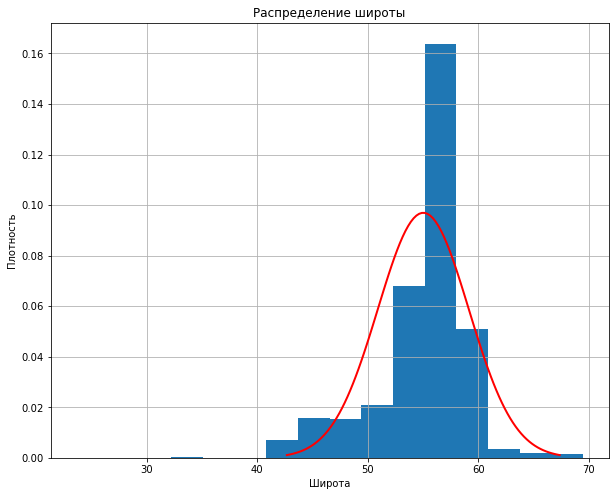

In [494]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.hist(df.latitude, density=True, 
         bins = 'sturges')

plt.ylabel('Плотность')
plt.xlabel('Широта')
ax.set_title('Распределение широты')

mean = np.mean(df.latitude)
std = np.std(df.latitude)
x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2) ), linewidth=2, color='r')

ax.grid()
plt.show()

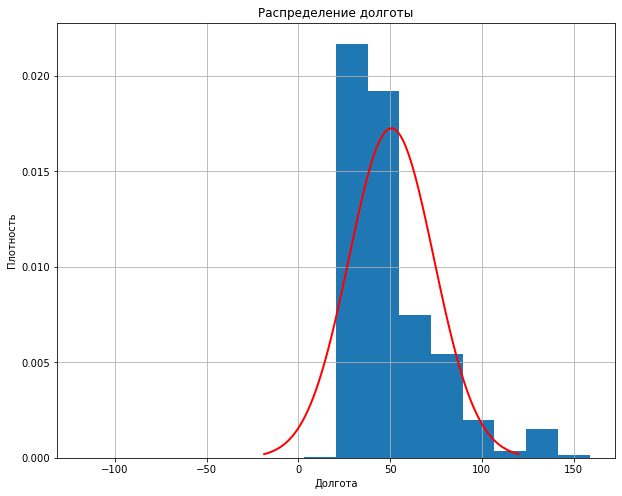

In [495]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.hist(df.longtitude, density=True, 
         bins = 'sturges')

plt.ylabel('Плотность')
plt.xlabel('Долгота')
ax.set_title('Распределение долготы')

mean = np.mean(df.longtitude)
std = np.std(df.longtitude)
x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2) ), linewidth=2, color='r')

ax.grid()
plt.show()

## Анализ качественных признаков

## Города

В большом количестве(10 тысяч) вакансий город не указан. Такие значения мы заполним категорией "Неизвестно". Города, которые попадаются меньше трех раз мы объеденим в одну категорию "Другие", т.к. в таком случае эта категория получается не такой большой по сравнению с другими категориями. 

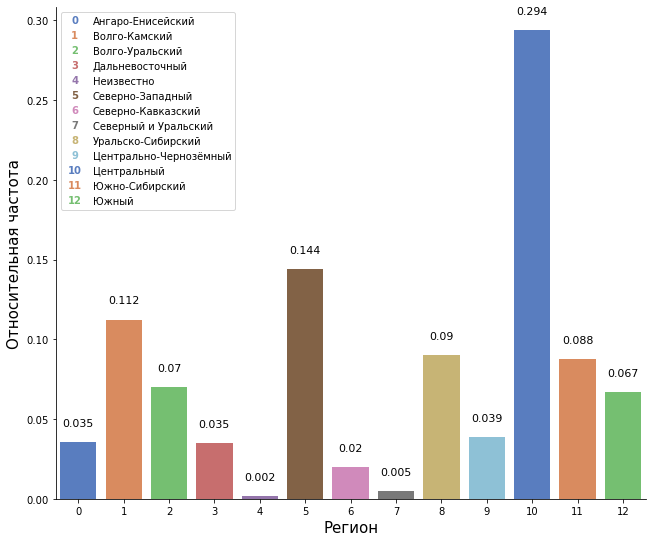

,Регион,Количество вакансий,Процент,Накопленный процент
0,Волго-Камский,2263,11.2,11.2
1,Южный,1346,6.7,17.9
2,Южно-Сибирский,1769,8.8,26.7
3,Центральный,5918,29.4,56.1
4,Дальневосточный,699,3.5,59.5
5,Ангаро-Енисейский,715,3.5,63.1
6,Уральско-Сибирский,1820,9.0,72.1
7,Северно-Западный,2897,14.4,86.5
8,Волго-Уральский,1416,7.0,93.5
9,Северно-Кавказский,401,2.0,95.5


In [496]:
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]

le = preprocessing.LabelEncoder()
encoded = pd.Series(le.fit_transform(df.Region))

df1 = encoded.value_counts(normalize=True)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x='index', y='percent', kind='bar', data=df1, palette='muted')

g.ax.set_xlabel('Регион', fontsize = 15)
g.ax.set_ylabel('Относительная частота', fontsize = 15)

for rect in g.ax.patches:
    g.ax.text (rect.get_x() + rect.get_width()  / 2, rect.get_height() + 0.01, round(rect.get_height(), 3), horizontalalignment='center', fontsize = 11)

handltext = le.transform(le.classes_).astype(str)
labels = le.classes_

t = g.ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,g.ax.patches)]

g.ax.legend(handles, labels, handler_map={tuple : TextHandler()})
g.fig.set_figwidth(10)
g.fig.set_figheight(8)

plt.show()

pd.DataFrame(data={key: val for key, val in 
                   zip([
                       "Регион", 
                       "Количество вакансий",
                       "Процент",
                       "Накопленный процент"
                   ], 
                       [
                           df['Region'].unique(),
                           pd.value_counts(df['Region'], sort=False),
                           np.around(pd.value_counts(df['Region'], sort=False) / len(df['Region']) * 100, 1),
                           (lambda arr: [np.around(arr[:idx + 1].sum(), 1) for idx in range(len(arr))])(pd.value_counts(df['Region'], sort=False) / len(df['Region']) * 100)
                       ])}
            ).reset_index(drop=True)

## Сопроводительное письмо 

Данная переменная очень сильно не сбалансирована и вакансии, для которых сопроводительное письмо обязательно для ~1% вакансий. 

In [497]:
df.response_letter_required.value_counts()

False    19914
True       230
Name: response_letter_required, dtype: int64

In [498]:
df.response_letter_required = df.response_letter_required.map({False: 0, True: 1}) 

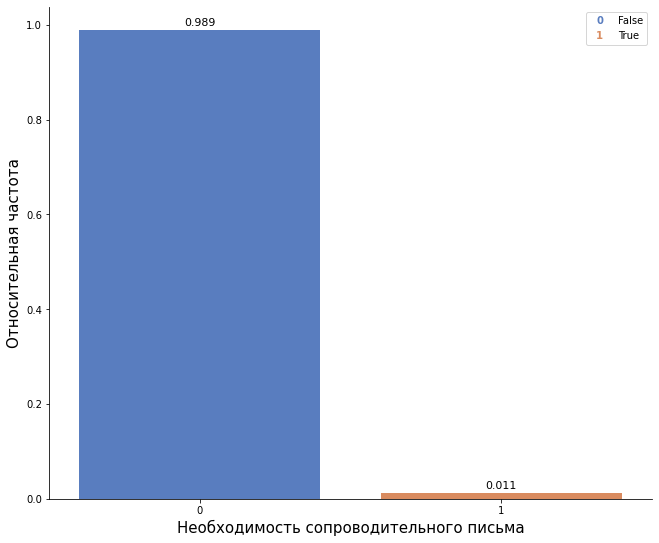

,Регион,Количество вакансий,Процент,Накопленный процент
0,0,19914,98.9,98.9
1,1,230,1.1,100.0


In [499]:
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
from matplotlib.pyplot import figure

class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]


df1 = df.response_letter_required.value_counts(normalize=True)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x='index', y='percent',kind='bar', data=df1, palette='muted')

g.ax.set_xlabel('Необходимость сопроводительного письма', fontsize = 15)
g.ax.set_ylabel('Относительная частота', fontsize = 15)

for rect in g.ax.patches:
    g.ax.text (rect.get_x() + rect.get_width()  / 2, rect.get_height() + 0.01, round(rect.get_height(), 3), horizontalalignment='center', fontsize = 11)

handltext = ['0', '1']
labels = [ "False", "True"]

t = g.ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,g.ax.patches)]

g.ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 
g.fig.set_figwidth(10)
g.fig.set_figheight(8)

plt.show()

pd.DataFrame(data={key: val for key, val in 
                   zip([
                       "Регион", 
                       "Количество вакансий",
                       "Процент",
                       "Накопленный процент"
                   ], 
                       [
                           df['response_letter_required'].unique(),
                           pd.value_counts(df['response_letter_required'], sort=False),
                           np.around(pd.value_counts(df['response_letter_required'], sort=False) / len(df['response_letter_required']) * 100, 1),
                           (lambda arr: [np.around(arr[:idx + 1].sum(), 1) for idx in range(len(arr))])(pd.value_counts(df['response_letter_required'], sort=False) / len(df['response_letter_required']) * 100)
                       ])}
            ).reset_index(drop=True)

## Тест

Лишь около 1% вакансий требуют прохождение тестового задания для отклика на вакансию, эта переменная очень не сбалансирована

In [500]:
df.has_test.value_counts()

False    19983
True       161
Name: has_test, dtype: int64

In [501]:
df.has_test = df.has_test.map({False: 0, True: 1})

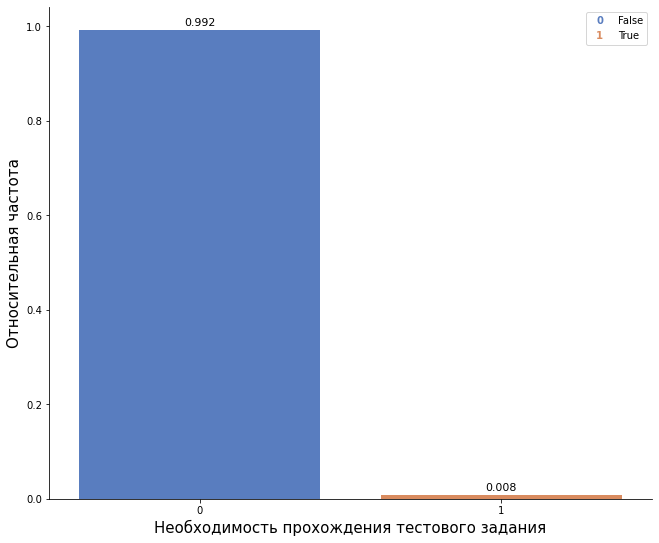

,Регион,Количество вакансий,Процент,Накопленный процент
0,0,19983,99.2,99.2
1,1,161,0.8,100.0


In [502]:
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]


df1 = df.has_test.value_counts(normalize=True)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x='index', y='percent',kind='bar', data=df1, palette='muted')

g.ax.set_xlabel('Необходимость прохождения тестового задания', fontsize = 15)
g.ax.set_ylabel('Относительная частота', fontsize = 15)

for rect in g.ax.patches:
    g.ax.text (rect.get_x() + rect.get_width()  / 2, rect.get_height() + 0.01, round(rect.get_height(), 3), horizontalalignment='center', fontsize = 11)

handltext = ['0', '1']
labels = [ "False", "True"]

t = g.ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,g.ax.patches)]

g.ax.legend(handles, labels, handler_map={tuple : TextHandler()})
g.fig.set_figwidth(10)
g.fig.set_figheight(8)

plt.show()

pd.DataFrame(data={key: val for key, val in 
                   zip([
                       "Регион", 
                       "Количество вакансий",
                       "Процент",
                       "Накопленный процент"
                   ], 
                       [
                           df['has_test'].unique(),
                           pd.value_counts(df['has_test'], sort=False),
                           np.around(pd.value_counts(df['has_test'], sort=False) / len(df['has_test']) * 100, 1),
                           (lambda arr: [np.around(arr[:idx + 1].sum(), 1) for idx in range(len(arr))])(pd.value_counts(df['has_test'], sort=False) / len(df['has_test']) * 100)
                       ])}
            ).reset_index(drop=True)

## Опыт работы

Требования к опыту работы несбалансированы

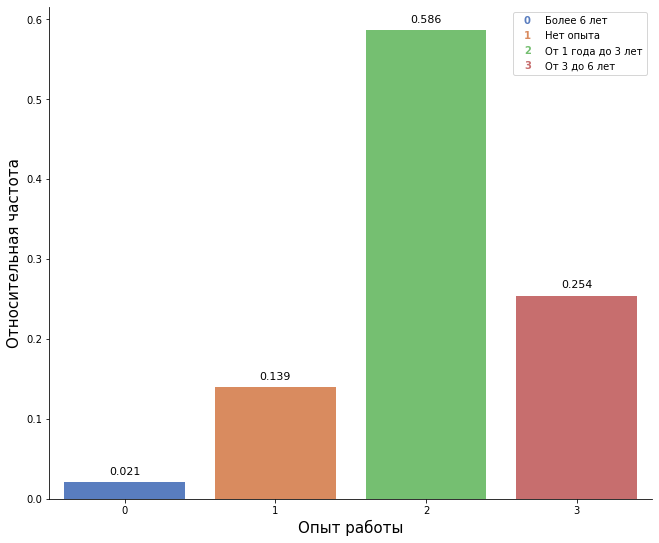

,Регион,Количество вакансий,Процент,Накопленный процент
0,Нет опыта,2803,13.9,13.9
1,От 1 года до 3 лет,11810,58.6,72.5
2,От 3 до 6 лет,5116,25.4,97.9
3,Более 6 лет,415,2.1,100.0


In [503]:
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]

le = preprocessing.LabelEncoder()
encoded = pd.Series(le.fit_transform(df.experience))
    
df1 = encoded.value_counts(normalize=True)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x='index', y='percent',kind='bar', data=df1, palette='muted')

g.ax.set_xlabel('Опыт работы', fontsize = 15)
g.ax.set_ylabel('Относительная частота', fontsize = 15)

for rect in g.ax.patches:
    g.ax.text (rect.get_x() + rect.get_width()  / 2, rect.get_height() + 0.01, round(rect.get_height(), 3), horizontalalignment='center', fontsize = 11)

handltext = le.transform(le.classes_).astype(str)
labels = le.classes_

t = g.ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,g.ax.patches)]

g.ax.legend(handles, labels, handler_map={tuple : TextHandler()})
g.fig.set_figwidth(10)
g.fig.set_figheight(8)

plt.show()

pd.DataFrame(data={key: val for key, val in 
                   zip([
                       "Регион", 
                       "Количество вакансий",
                       "Процент",
                       "Накопленный процент"
                   ], 
                       [
                           df['experience'].unique(),
                           pd.value_counts(df['experience'], sort=False),
                           np.around(pd.value_counts(df['experience'], sort=False) / len(df['experience']) * 100, 1),
                           (lambda arr: [np.around(arr[:idx + 1].sum(), 1) for idx in range(len(arr))])(pd.value_counts(df['experience'], sort=False) / len(df['experience']) * 100)
                       ])}
            ).reset_index(drop=True)

## Навыки

In [504]:
one_c = df.loc[:, df.columns.str.contains('1С')].sum(axis=1).apply(lambda x: min([x, 1]))

In [505]:
df.drop(df.columns[df.columns.str.contains('1С')], axis = 1, inplace = True)
df.loc[:, '1С'] = one_c

In [506]:
skills_count = df.iloc[:, 10:].sum(axis = 0)

In [507]:
skills_count = skills_count.sort_values(ascending=False)

skills_per = skills_count / skills_count.values.sum()

In [508]:
skills_df = pd.DataFrame({'ind': range(skills_per.shape[0]), 'skills': skills_per.index, 'percent': skills_per.values})

In [509]:
skills_df

,ind,skills,percent
0,0,1С,0.056395
1,1,Грамотная речь,0.052690
2,2,Техническое обслуживание,0.038610
3,3,Linux,0.032718
4,4,Работа в условиях многозадачности,0.032274
5,5,SQL,0.028679
6,6,Работа с большим объемом информации,0.028494
7,7,Adobe Photoshop,0.028309
8,8,Настройка ПК,0.027864
9,9,Грамотность,0.026567


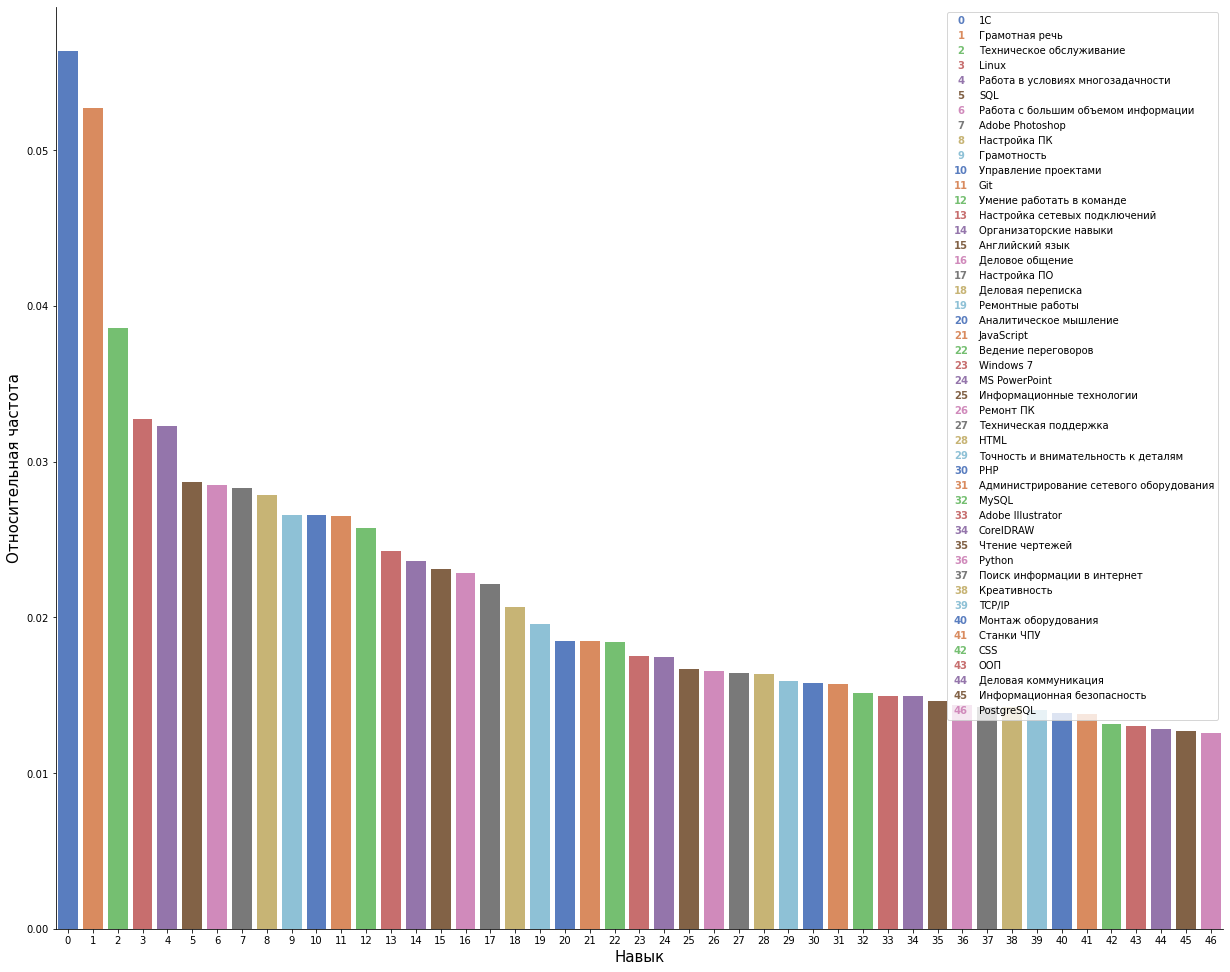

,Регион,Количество вакансий,Процент,Накопленный процент
0,1С,1522,5.639544,5.6
1,Грамотная речь,1422,5.269008,10.9
2,Техническое обслуживание,1042,3.860975,14.8
3,Linux,883,3.271825,18.0
4,Работа в условиях многозадачности,871,3.227360,21.3
5,SQL,774,2.867941,24.1
6,Работа с большим объемом информации,769,2.849415,27.0
7,Adobe Photoshop,764,2.830888,29.8
8,Настройка ПК,752,2.786424,32.6
9,Грамотность,717,2.656736,35.3


In [510]:
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]

g = sns.catplot(data = skills_df, x = 'ind', y = 'percent', kind='bar', palette='muted')

g.ax.set_xlabel('Навык', fontsize = 15)
g.ax.set_ylabel('Относительная частота', fontsize = 15)

handltext = skills_df.ind.astype(str).values
labels = skills_df.skills.values

t = g.ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,g.ax.patches)]

g.ax.legend(handles, labels, handler_map={tuple : TextHandler()})

g.fig.set_figwidth(20)
g.fig.set_figheight(15)

plt.show()

pd.DataFrame(data={key: val for key, val in 
                   zip([
                       "Регион", 
                       "Количество вакансий",
                       "Процент",
                       "Накопленный процент"
                   ], 
                       [
                           skills_count.index.unique(),
                           skills_count.values,
                           skills_per * 100,
                           (lambda arr: [np.around(arr[:idx + 1].sum(), 1) for idx in range(len(arr))])(skills_per * 100)
                       ])}
            ).reset_index(drop=True)

In [511]:
df.to_csv('../../data/final_data_models.csv', index = False)

## Гипотезы

In [512]:
df = pd.read_csv('../../data/final_data_models.csv')

1-я Гипотеза: Средняя зарплата на вакансиях с требованием знания английского выше, чем без такого требования
Для проверки этой гипотезы построим диаграмму Бокса-Вискера для категории английский язык

In [526]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15, 10

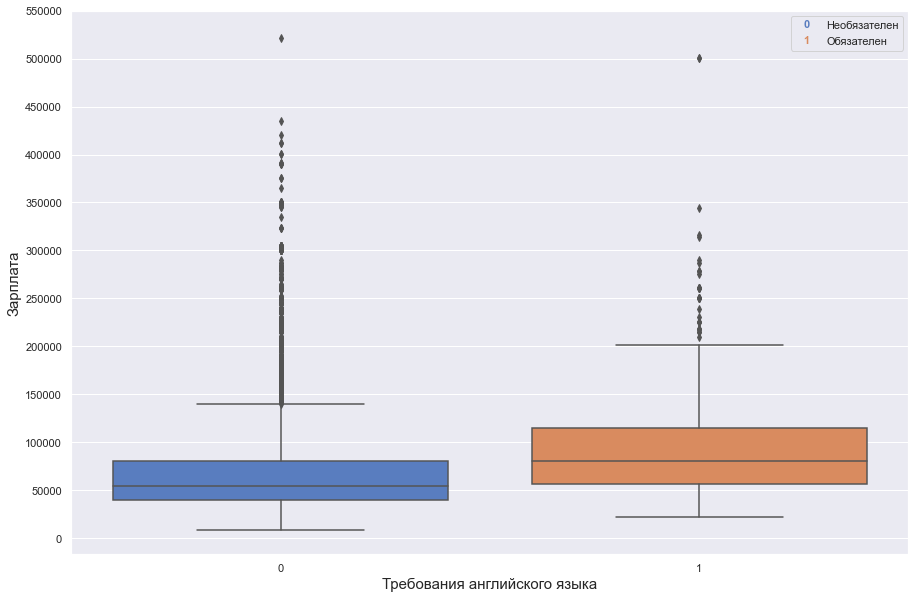

In [533]:
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
from matplotlib.pyplot import figure

class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]


g = sns.boxplot(x='Английский язык', y='salary',data=df, palette='muted')

g.set_xlabel('Требования английского языка', fontsize = 15)
g.set_ylabel('Зарплата', fontsize = 15)

handltext = ['0', '1']
labels = [ "Необязателен", "Обязателен"]

t = g.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,g.patches)]

g.legend(handles, labels, handler_map={tuple : TextHandler()})
g.set_yticks(np.arange(0, 600000, 50000))

plt.show()

Мы видим, что и медиана, и 75 квартиль для вакансий с требованием английского языка выше вакансий без такого требования. Проверим равенство медиан с помощью критерия Манна-Уитни. 

In [538]:
_, p = scipy.stats.mannwhitneyu(df[df['Английский язык'] == 1].salary, df[df['Английский язык'] == 0].salary)
print('p-value= ', p)
if p < 0.05: 
    print('Отвергаем гипотезу о равенстве медиан')
else: 
    print('Нет оснований отвергнуть гипотезу о равенстве медиан')

p-value=  1.612993629262742e-57
Отвергаем гипотезу о равенстве медиан


2-я Гипотеза: При росте опыта работы зарплата разработчиков с навыками JavaScript растет быстрее чем для разработчиков с навыками 1С

In [653]:
one_s = (df[df['1С'] == 1].groupby('experience')['salary'].mean().sort_values().pct_change() * 100)[1:]

In [654]:
js = (df[df['JavaScript'] == 1].groupby('experience')['salary'].mean().sort_values().pct_change() * 100)[1:]

In [655]:
df_plot = pd.concat([one_s, js], axis = 0).reset_index()

In [656]:
df_plot

,experience,salary
0,От 1 года до 3 лет,50.510920
1,От 3 до 6 лет,40.996543
2,Более 6 лет,18.412548
3,От 1 года до 3 лет,38.277091
4,От 3 до 6 лет,76.609596
5,Более 6 лет,44.605466


In [657]:
df_plot['skill'] = ['1С' for _ in range(3)] + ['Javascript' for _ in range(3)]

In [658]:
df_plot.salary = df_plot.salary.round(1)

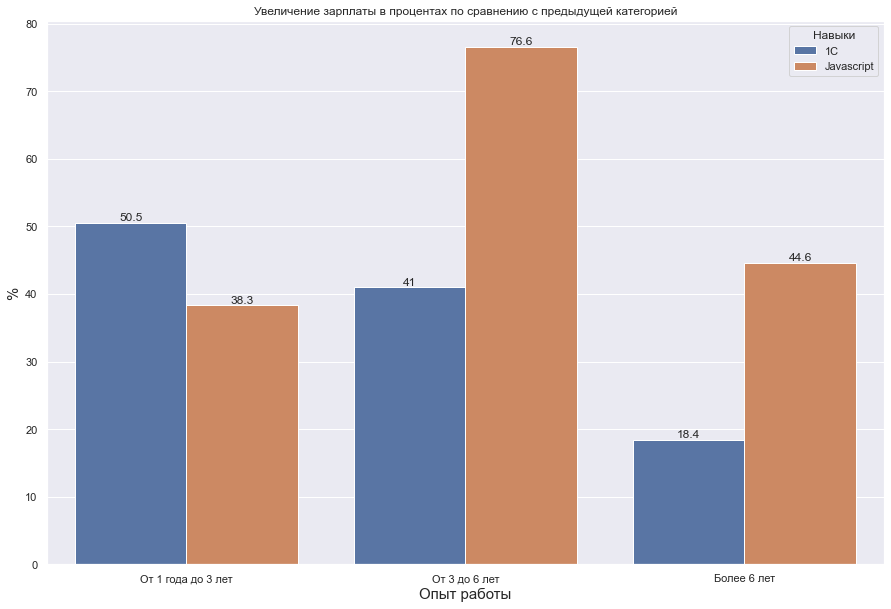

In [659]:
ax = sns.barplot(data=df_plot, x="experience", y="salary", hue='skill')
for container in ax.containers:
    ax.bar_label(container)

plt.title('Увеличение зарплаты в процентах по сравнению с предыдущей категорией')
plt.xlabel('Опыт работы', fontsize=15)
plt.ylabel('%', fontsize=15)
ax.legend(title='Навыки')
plt.show()

По графику процентного изменения цены от опыта работы мы видим, что разработчики Javascript работающие от трех лет имеют большую прибавку к зарплате, чем разработчики 1С

3-я Гипотеза: 3. При росте опыта работы зарплата операторов станка растет быстрее, чем зарплата фрезеровщиков

In [663]:
mech = (df[df['name'].str.contains('фрезе', flags=re.IGNORECASE)].groupby('experience')['salary'].mean()\
         .reindex(['Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет', 'Более 6 лет']).pct_change() * 100)[1:]

In [664]:
oper = (df[df['name'].str.contains('Оператор станка', flags=re.IGNORECASE)].groupby('experience')['salary'].mean()\
         .reindex(['Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет', 'Более 6 лет']).pct_change() * 100)[1:]

In [665]:
df_plot = pd.concat([mech, oper], axis = 0).reset_index()

In [666]:
df_plot

,experience,salary
0,От 1 года до 3 лет,13.410085
1,От 3 до 6 лет,19.158108
2,Более 6 лет,6.973756
3,От 1 года до 3 лет,19.767129
4,От 3 до 6 лет,18.006758
5,Более 6 лет,30.621765


In [667]:
df_plot['skill'] = ['Фрезеровщик' for _ in range(3)] + ['Оператор станка' for _ in range(3)]

In [668]:
df_plot.salary = df_plot.salary.round(1)

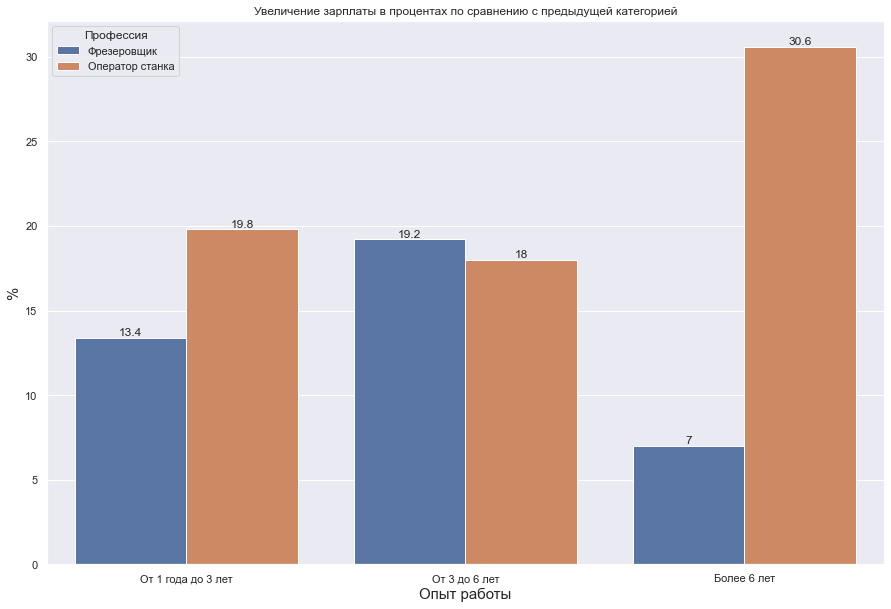

In [669]:
ax = sns.barplot(data=df_plot, x="experience", y="salary", hue='skill')
for container in ax.containers:
    ax.bar_label(container)

plt.title('Увеличение зарплаты в процентах по сравнению с предыдущей категорией')
plt.xlabel('Опыт работы', fontsize=15)
plt.ylabel('%', fontsize=15)
ax.legend(title='Профессия')
plt.show()

По графику процентного изменения цены от опыта работы мы видим, что операторы станка имеют большую прибавку к зарплате, чем фрезеровщики

In [453]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [454]:
RAND = 42

In [455]:
df.set_index('name', inplace=True)
labelencoder = LabelEncoder()

cols = ["Region"]
df_labelencoder = df.copy()
for i, name in enumerate(cols):
    df_labelencoder[name] = labelencoder.fit_transform(df_labelencoder[name])
    
df_labelencoder.experience = df_labelencoder.experience.map({'Нет опыта': 0, 'От 1 года до 3 лет': 1, 
                                                             'От 3 до 6 лет': 2, 'Более 6 лет': 3})

In [456]:
X = df_labelencoder.loc[:, df.columns != 'salary'] 
y = df_labelencoder.loc[:, 'salary']

In [457]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RAND)

In [458]:
X_train

,response_letter_required,latitude,longtitude,experience,has_test,Region,Работа в команде,Пользователь ПК,Грамотная речь,Техническое обслуживание,...,Поиск информации в интернет,TCP/IP,Монтаж оборудования,Станки ЧПУ,CSS,ООП,Деловая коммуникация,Информационная безопасность,PostgreSQL,1С
name,,,,,,,,,,,,,,,,,,,,,
Плазморезчик,0,56.071484,92.916056,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Оператор станков с ЧПУ,0,51.493195,45.953098,1,0,2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Оператор 1C,0,45.049991,42.014430,1,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Программист 1C,0,53.323879,83.641983,1,0,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Бренд-шеф повар / разработчик новых блюд Фаст-фуд,0,54.172409,37.890633,1,0,10,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Инженер-программист АСУ ТП,0,56.819691,60.618217,1,0,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Junior бизнес-аналитик,0,43.166143,131.903640,1,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Менеджер по проектам,0,55.779585,37.689716,1,0,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [459]:
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     171.9
Date:                Tue, 20 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:02:39   Log-Likelihood:            -2.4052e+05
No. Observations:               20144   AIC:                         4.812e+05
Df Residuals:                   20088   BIC:                         4.816e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [27]:
skills = [i.split('_') for i in df.skills.astype(str)]

In [29]:
skills = pd.Series([item for sublist in skills for item in sublist]).value_counts()

In [32]:
names = df.name.value_counts()

In [44]:
names[names.index.str.contains('тока', flags=re.IGNORECASE)].sum()

2266

In [45]:
names[names.index.str.contains('фрезе', flags=re.IGNORECASE)].sum()

1016

In [34]:
df.skills = df.skills.astype(str)
df.name = df.name.astype(str)

In [104]:
js_skills = df[df.skills.str.contains('Javascri', flags=re.IGNORECASE)]

In [105]:
js_skills.shape

(822, 17)

In [47]:
import numpy as np

In [108]:
js_skills['salary_from'] = js_skills['salary_from'].fillna(0)
js_skills['salary_to'] = js_skills['salary_to'].fillna(0)
js_skills['salary'] = js_skills.loc[:,'salary_from'] + js_skills.loc[:,'salary_to']
js_skills.loc[(js_skills.salary_from != 0) & (js_skills.salary_to != 0), 'salary'] = js_skills.salary / 2

js_skills.groupby("experience").agg({"salary": [np.mean, 'count']}).round(0)

C:\Users\Denis\AppData\Local\Temp\ipykernel_484\3147198672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  js_skills['salary_from'] = js_skills['salary_from'].fillna(0)
C:\Users\Denis\AppData\Local\Temp\ipykernel_484\3147198672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  js_skills['salary_to'] = js_skills['salary_to'].fillna(0)
C:\Users\Denis\AppData\Local\Temp\ipykernel_484\3147198672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

salary      
                        mean count
experience                        
Более 6 лет         245289.0    19
Нет опыта            73667.0    51
От 1 года до 3 лет  103065.0   475
От 3 до 6 лет       156201.0   277

In [109]:
js_skills.shape

(822, 18)

In [116]:
ones_skills = df[df.skills.str.contains('1с', flags=re.IGNORECASE)]

In [117]:
ones_skills.shape

(2950, 17)

In [24]:
df[df.skills.str.contains('английс', flags=re.IGNORECASE)]['salary'].mean()

93191.9803883495

In [25]:
df[~df.skills.str.contains('английс', flags=re.IGNORECASE)]['salary'].mean()

72110.09955325475

In [50]:
tokar = df[df.name.str.contains('токар', flags=re.IGNORECASE)]

In [51]:
tokar.groupby("experience").agg({"salary": [np.mean, 'count']}).round(0)

salary      
                       mean count
experience                       
Более 6 лет         71205.0    59
Нет опыта           51878.0   176
От 1 года до 3 лет  61459.0  1347
От 3 до 6 лет       63702.0   684

In [62]:
freze = df[df.name.str.contains('механи', flags=re.IGNORECASE)]

In [63]:
freze.groupby("experience").agg({"salary": [np.mean, 'count']}).round(0)

salary      
                       mean count
experience                       
Более 6 лет         72169.0    36
Нет опыта           44524.0   154
От 1 года до 3 лет  56255.0  1261
От 3 до 6 лет       69127.0   868